In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import util
import json
from sklearn.ensemble import IsolationForest

SERVICE = 'ServiceA' 
LAMBDA = 'LambdaA'

USE_DURATION = True

metrics = [
    {"SERVICE": "ServiceA", "LAMBDA": "LambdaA", "dfs": []},
    {"SERVICE": "ServiceC", "LAMBDA": "LambdaA", "dfs": []},
    {"SERVICE": "ServiceD", "LAMBDA": "LambdaA", "dfs": []},
    {"SERVICE": "ServiceE", "LAMBDA": "LambdaA", "dfs": []},
]

for i, metric in enumerate(metrics):
    metrics[i]["dfs"] = util.json_to_pandas(f"../ExportedMetrics/{metric['SERVICE']}/{metric['LAMBDA']}.json")

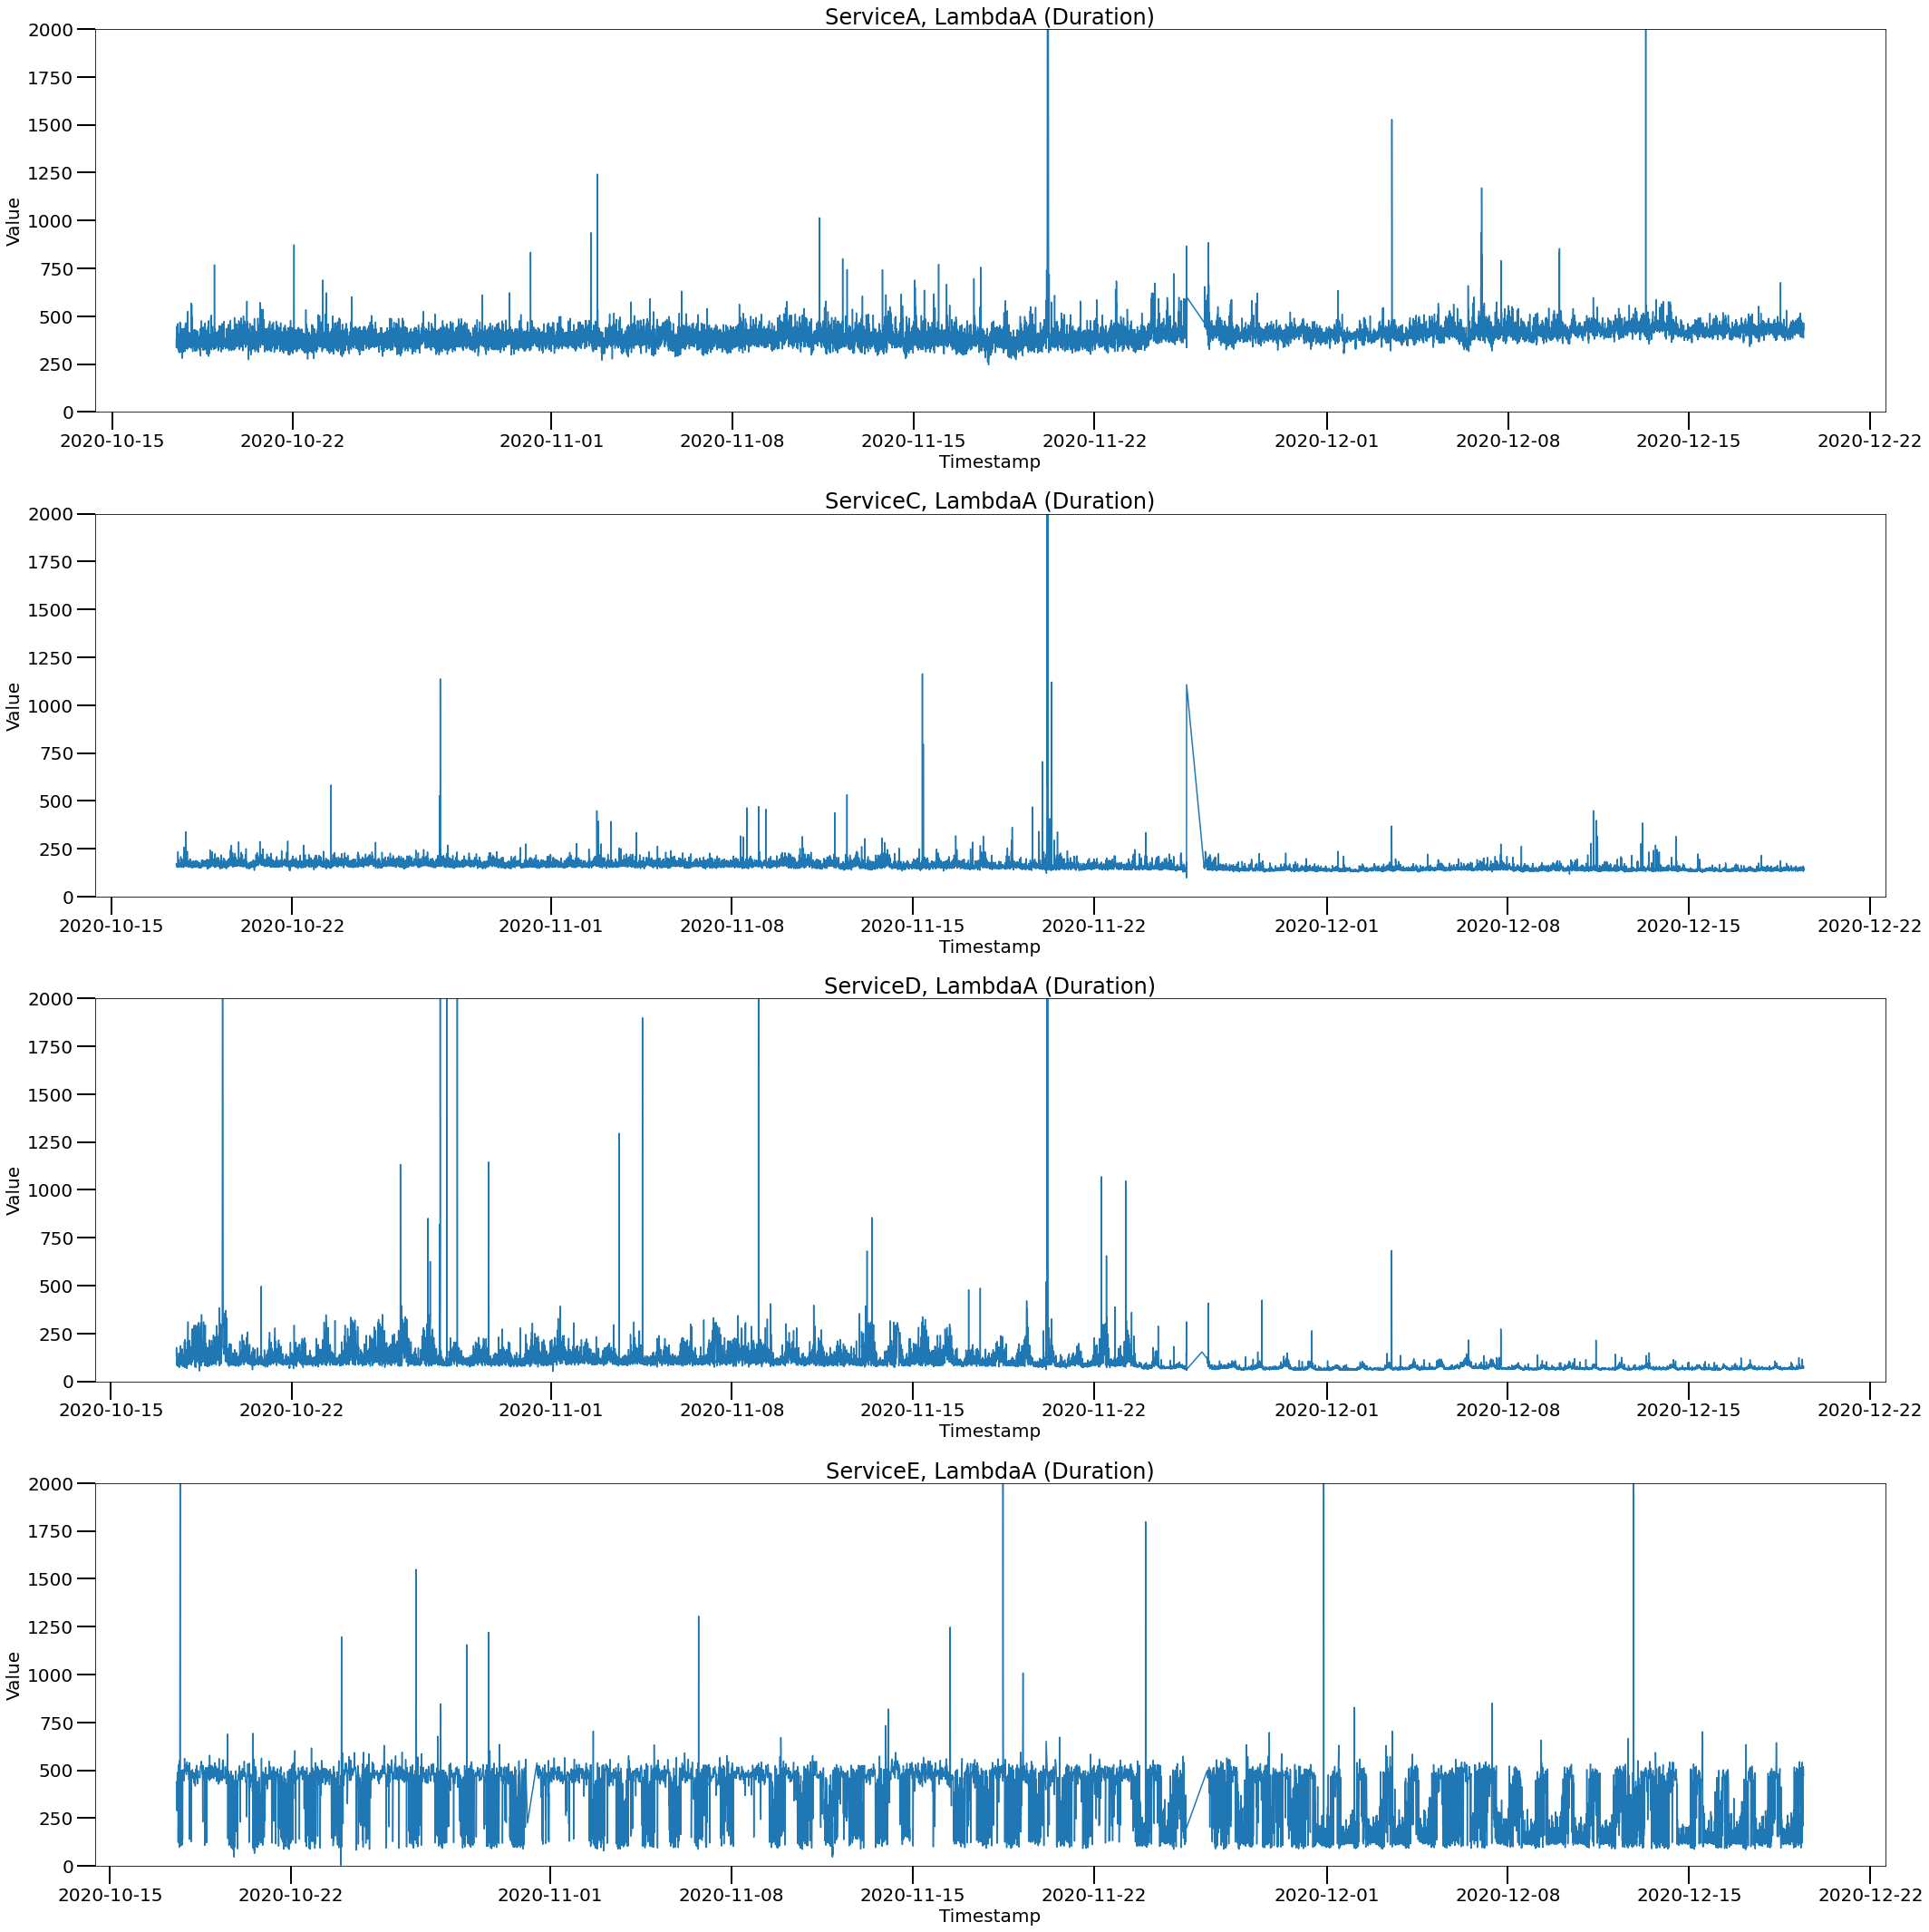

In [4]:
matplotlib.interactive('True')
matplotlib.rc('font', **{
    'family': 'DejaVu Sans',
    'size': 20
})

fig, axs = plt.subplots(len(metrics), 1, figsize=(30,30), sharex=False)

for i, metric in enumerate(metrics):
    to_plot = metric["dfs"]["Duration" if USE_DURATION else "ConcurrentExecutions"]

    axs[i].plot(to_plot.Timestamps, to_plot.Values)
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel('Value')
    axs[i].tick_params(length=20, width=2)
    if (USE_DURATION):
        axs[i].set_ylim(0, 2000)
    axs[i].set_title(f"{metric['SERVICE']}, {metric['LAMBDA']} ({'Duration' if USE_DURATION else 'ConcurrentExecutions'})")

savedir = f'{os.getcwd()}\\output\\raw'
if not os.path.exists(savedir):
    os.makedirs(savedir)

plt.tight_layout()
plt.savefig(f'{savedir}\\{"Duration" if USE_DURATION else "ConcurrentExecutions"}.pdf', transparent=False, bbox_tight="inches")
plt.savefig(f'{savedir}\\{"Duration" if USE_DURATION else "ConcurrentExecutions"}.png', transparent=False, bbox_tight="inches")
plt.show()